# Prediksi Pasien yang Memiliki Penyakit Jantung

Alur yang digunakan dalam analisis :

    1. Problem understanding :
        -> untuk memprediksi calon pasien yang memiliki penyakit jantung
        -> sehingga dapat digunakan dalam pengambilan keputusan 
        
    2. Data understanding
        -> Pemahaman tentang data yang akan digunakan
        
    3. Data Preparation
        -> Dilakukan tahap data preprocessing 
        
    4. Modelling
        -> Model yg digunakan Logistic Regression, KNN, SVM, NB, DT, RT
        
    5. Evaluation
        -> lakukan prediksi pada train data,
        -> lakukan prediksi pada test data,
        -> jika kurang kembali ke langkah 4
        
    6. Deployment
        -> model terbaik di gunakan untuk prediksi pasien

In [1]:
# import pkg pengolah  dataframe dan numerik
import pandas as pd
import numpy as np


## Data understanding
### There are 14 columns:
```
age. The age of the patient.
sex. The gender of the patient. (1 = male, 0 = female).
cp. Type of chest pain. (0 = typical angina, 1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic).
trestbps. Resting blood pressure in mmHg.
chol. Serum Cholestero in mg/dl.
fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
thalach. Max heart rate achieved.
exang. Exercise induced angina (1 = yes, 0 = no).
oldpeak. ST depression induced by exercise relative to rest.
slope. Peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).
ca. Number of major vessels (0–3) colored by flourosopy.
thal. Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect, 3 = ).
target. Diagnosis of heart disease (0 = absence, 1 = present).
```

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.shape

(1025, 14)

In [4]:
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
#import pandas_profiling #buka komen ini untuk melihat lebih detail tentang datasetnya
# df.profile_report()

In [7]:
# cek nama kolom, jumlah null, dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
print('Count of unique value sin each column :')
print(df.nunique())

Count of unique value sin each column :
age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


Terdapat kolom 5 dengan data yang discrete,
 >   age, trestbps, chol, thalach oldpeak

Terdapat 9 kolom dengan data yang kategorikal
 >   sex, cp, fbs, restecg, exang, slope, ca, thal , target

In [10]:
# import pkg untuk visualisasi
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot"])
import seaborn as sns

In [11]:
# check target data untuk melihat persebaran data

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [13]:
# membuat fungsi cek kolom
# untuk data tipe kategorikal
def checkColumn(h,df) :
    df_ = df.T.value_counts().reset_index()
    ax = sns.barplot(x='index', y=h, data=df_)

In [14]:
df['target'].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [15]:
#df_target.head()

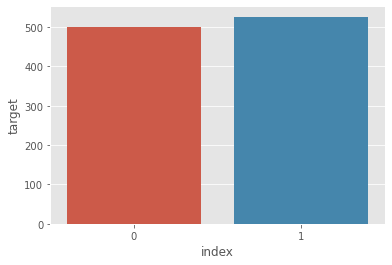

In [16]:
checkColumn('target',df['target'])

In [17]:
list(df.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [18]:
# untuk data discrete
def buatHistogram(df,n=10, judul="Distribusi Frekuensi"):
    #n = int((max(df)) - min(df))+1
    freq, bin_edges = np.histogram(df, bins=n)
    print(freq)
    bin_edges = (bin_edges * 10).astype(int) / 10
    print(bin_edges)

    df.plot(kind="hist", 
                 bins=n,
                 xticks=bin_edges,
                 figsize=(6,4),
                 color=["coral"])

    plt.title(judul)

In [19]:
# untuk check distribusi normal
def dist_norm(df) :
    sample_means = []
    n = 25
    for sample in range(0, 442):
        # random sampling done with replacement
        sample_values = np.random.choice(a=df, size=n)    
        sample_mean = np.mean(sample_values)
        sample_means.append(sample_mean)

    # View Distribution of Sample Means (Otherwise Called Sampling Distribution)
    sns.distplot(sample_means)
    plt.title("Distribution of Sample Means ($n=25$) ", y=1.015, fontsize=20)
    plt.xlabel("sample mean ", labelpad=14)
    plt.ylabel("frequency of occurence", labelpad=14);

[  4   0  21  18  25  84  61  64  38  82 109  96 151  68  66  83  21  25
   3   6]
[29.  31.4 33.8 36.2 38.6 41.  43.4 45.8 48.2 50.5 53.  55.4 57.8 60.2
 62.6 65.  67.4 69.8 72.1 74.6 77. ]


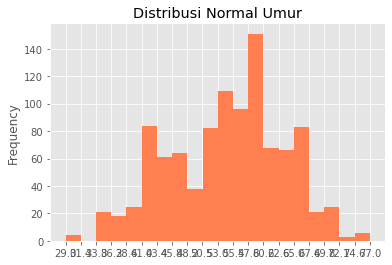

In [20]:
# cek kolom age
buatHistogram(df['age'],20, 'Distribusi Normal Umur')

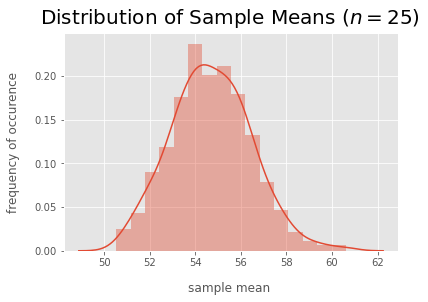

In [21]:
# Distribusi normal kolom age
dist_norm(df['age'])

[  7  26  33 107 156  76 175  76 152  40  79  10  36   7  18  10  10   0
   3   4]
[ 94.   99.3 104.6 109.9 115.2 120.5 125.8 131.1 136.4 141.7 147.  152.3
 157.6 162.8 168.2 173.5 178.8 184.1 189.3 194.7 200. ]


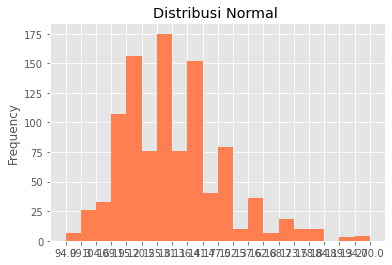

In [22]:
# cek kolom trestbps
buatHistogram(df['trestbps'],20, 'Distribusi Normal ')

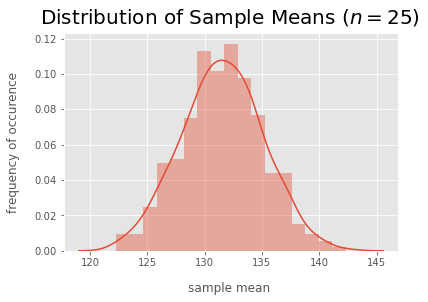

In [23]:
dist_norm(df['trestbps'])

[  9  33  70 177 193 166 136  95  80  40  10   0  10   3   0   0   0   0
   0   3]
[126.  147.9 169.8 191.7 213.6 235.5 257.4 279.2 301.2 323.1 345.  366.9
 388.7 410.7 432.6 454.5 476.4 498.3 520.2 542.  564. ]


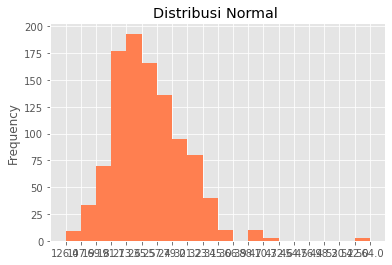

In [24]:
# cek kolom chol
buatHistogram(df['chol'],20, 'Distribusi Normal ')


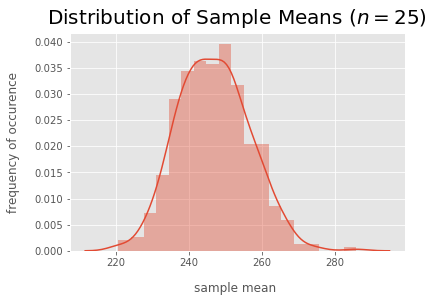

In [25]:
dist_norm(df['chol'])

[  4   0   6  15  11  28  47  40  54  73  94  86 126 129 105 107  65  18
  13   4]
[ 71.   77.5  84.1  90.6  97.2 103.7 110.3 116.8 123.4 129.9 136.5 143.
 149.6 156.1 162.7 169.2 175.8 182.3 188.8 195.4 202. ]


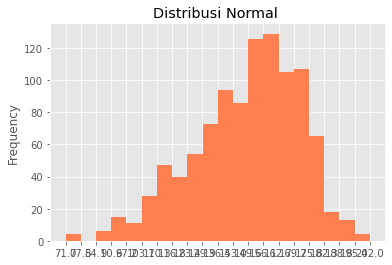

In [26]:
#cek kolom thalach
buatHistogram(df['thalach'],20, 'Distribusi Normal ')

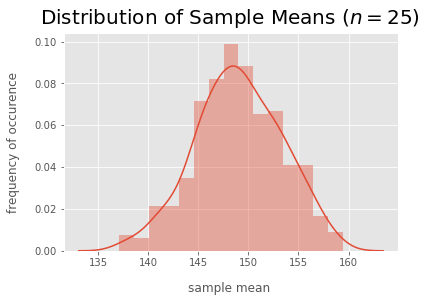

In [27]:
dist_norm(df['thalach'])

[399  92  57 115  63  73  51  32  28  42  22  18  16   6   4   0   0   0
   4   3]
[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3.1 3.4 3.7 4.  4.3 4.6 4.9 5.2
 5.5 5.8 6.2]


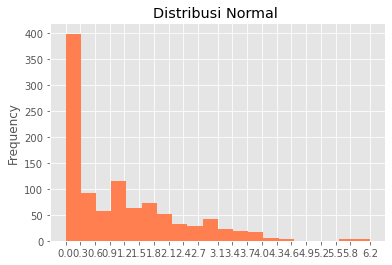

In [28]:
#cek kolom oldpeak
buatHistogram(df['oldpeak'],20, 'Distribusi Normal ')

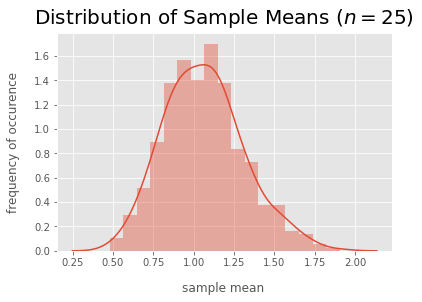

In [29]:
dist_norm(df['oldpeak'])

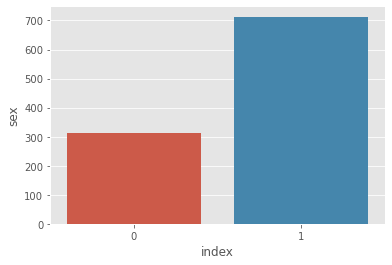

In [30]:
# cek kolom sex
checkColumn('sex',df['sex'])

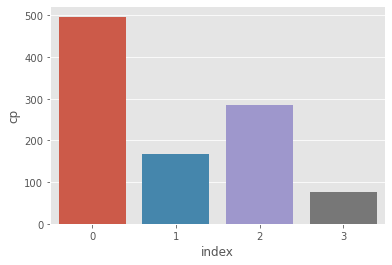

In [31]:
# cek kolom cp
checkColumn('cp',df['cp'])

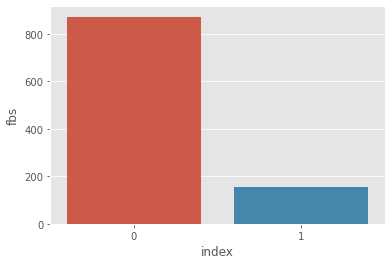

In [32]:
# cek kolom fbs
checkColumn('fbs',df['fbs'])


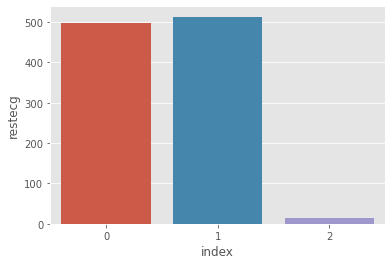

In [33]:
# cek kolom restecg
checkColumn('restecg',df['restecg'])


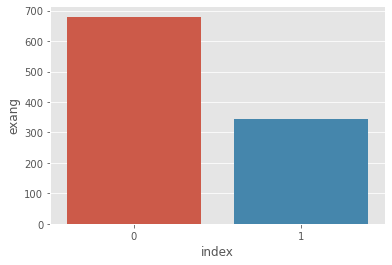

In [34]:
# cek kolom exang
checkColumn('exang',df['exang'])

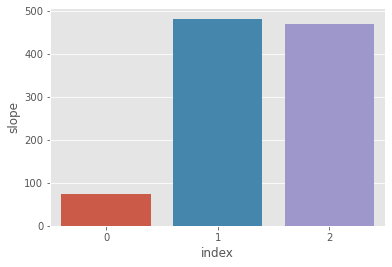

In [35]:
# cek kolom slope
checkColumn('slope',df['slope'])


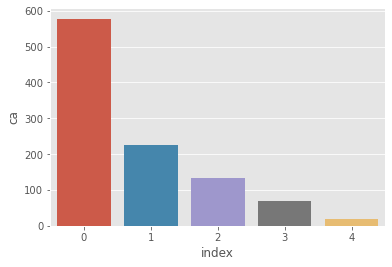

In [36]:
# cek kolom ca
checkColumn('ca',df['ca'])


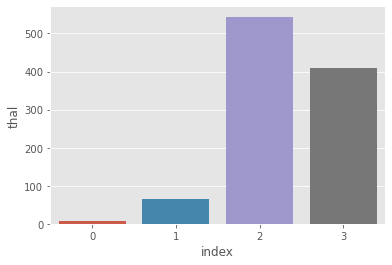

In [37]:
# cek kolom thal
checkColumn('thal',df['thal'])

### data preparation

pada tahap ini data akan di bagi menjadi 2, yaitu X sebagai feature, dan Y sebagai Target
kemudian di bagi menjadi data train dan test,
data train di gunakan untuk melatih model , dan data test di gunakan untuk mengecek keberhasilan model

In [38]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [39]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [41]:
# import pkg untuk split data
from sklearn.model_selection import train_test_split

In [42]:
# Train 70% test 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.3)

# Modelling
##  Klasifikasi dengan svm

In [43]:
from sklearn import svm

In [44]:
# disini digunakan parameter default
clf = svm.SVC(gamma='auto')
clf_svm = clf.fit(X_train, y_train).predict(X_test)

In [45]:
# cek parameter apa saja yang di miliki oleh SVM
svm.SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Evaluation

Pada tahap ini dilakukan pengecekan hasil setelah di terapkan algorithm SVM
Hasil yang di periksa adalah
```
Confusion matrix
Accuracy
```

In [46]:
# import pkg untuk lihat hasil klasifikasi

from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score

In [47]:
names=['Tidak ada penyakit jantung','Ada penyakit jantung']
print('\n clasification report Train data:\n',classification_report(y_train, clf.predict(X_train), 
                                                                    target_names=names, digits=2))
print('\n clasification report Test data::\n',classification_report(y_test, clf_svm, target_names=names, digits=2))
print('\n confussion matrix train data:\n',confusion_matrix(y_train, clf.predict(X_train)))
print('\n confussion matrix test data:\n',confusion_matrix(y_test, clf_svm))
print('\n Accuracy train data:\n',accuracy_score(y_train, clf.predict(X_train)))
print('\n Accuracy test data:\n',accuracy_score(y_test, clf_svm))


 clasification report Train data:
                             precision    recall  f1-score   support

Tidak ada penyakit jantung       1.00      1.00      1.00       338
      Ada penyakit jantung       1.00      1.00      1.00       379

                  accuracy                           1.00       717
                 macro avg       1.00      1.00      1.00       717
              weighted avg       1.00      1.00      1.00       717


 clasification report Test data::
                             precision    recall  f1-score   support

Tidak ada penyakit jantung       1.00      0.98      0.99       161
      Ada penyakit jantung       0.97      1.00      0.99       147

                  accuracy                           0.99       308
                 macro avg       0.99      0.99      0.99       308
              weighted avg       0.99      0.99      0.99       308


 confussion matrix train data:
 [[338   0]
 [  0 379]]

 confussion matrix test data:
 [[157   4]
 [  0 1

Berdasarkan hasil klasifikasi pada algorithm SVM dengan parameter default didapatkan :, 
```
akurasi pada data training sebesar 100%, 
sedangkan pada data test sebesar 98.7%, 
hasil ini terbilang sangat tinggi / akurat, 
kita akan mencoba apakah hasil pada data test dapat di tingkatkan lagi
```

In [48]:
# mencari parameter terbaik

### Penjelasan mengenai parameter penting pada SVM

**Kernels**: The main function of the kernel is to take low dimensional input space and transform it into a higher-dimensional space. It is mostly useful in non-linear separation problem.
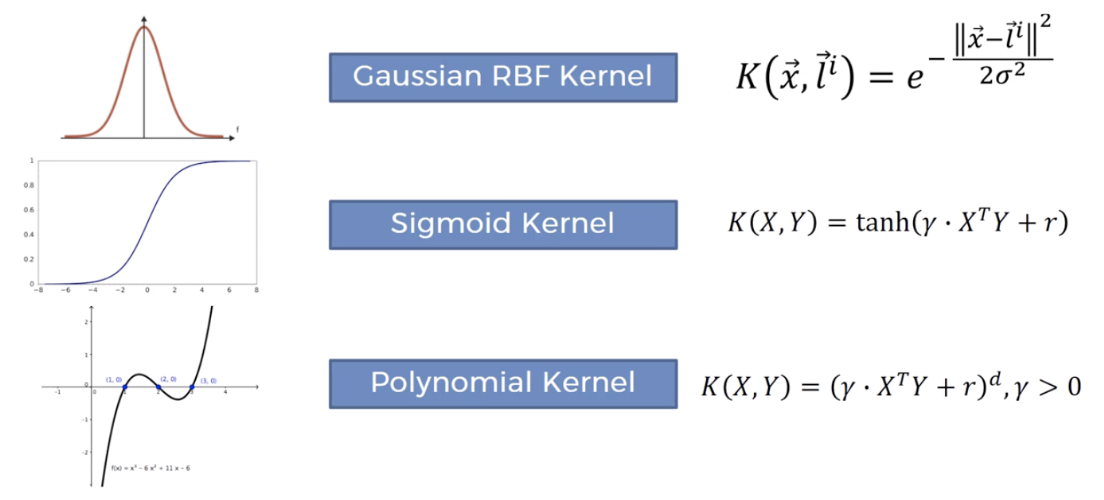

**C (Regularisation)** : C is the penalty parameter, which represents misclassification or error term. The misclassification or error term tells the SVM optimisation how much error is bearable. This is how you can control the trade-off between decision boundary and misclassification term.
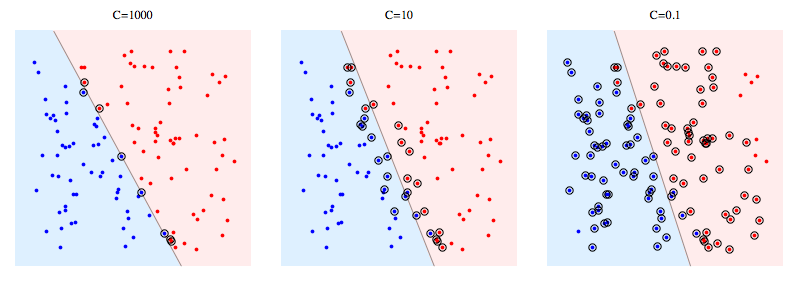
when C is high it will classify all the data points correctly, also there is a chance to overfit.

**Gamma** : It defines how far influences the calculation of plausible line of separation. 

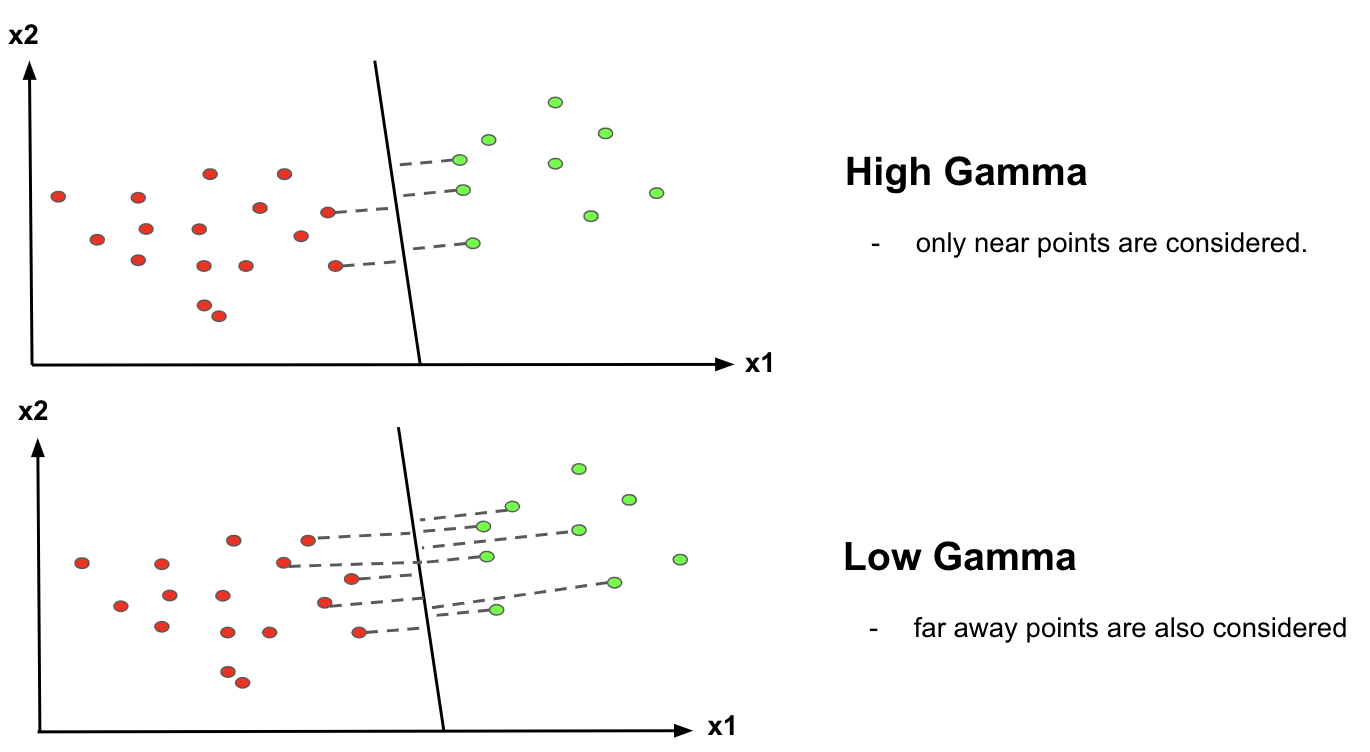
when gamma is higher, nearby points will have high influence; low gamma means far away points also be considered to get the decision boundary.

In [49]:
parameters = {'C': [0.1,1], 
              'gamma': [0.1,0.01],
              'kernel': ['rbf'],
                'probability' : [True]}

Disini kita akan mencari parameter terbaik dengan algorihm GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV


In [51]:
clf.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [52]:

search = GridSearchCV(svm.SVC(), parameters, refit=True,verbose=1)
search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 0.01], 'kernel': ['rbf'],
                         'probability': [True]},
             verbose=1)

In [53]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",search.best_estimator_)
print("\n The best score across ALL searched params:\n",search.best_score_)
print("\n The best parameters across ALL searched params:\n",search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=1, gamma=0.1, probability=True)

 The best score across ALL searched params:
 0.9414529914529914

 The best parameters across ALL searched params:
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}


In [54]:
model = search.best_params_

In [55]:
print(model)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}


# Modeling
Setelah mendapatkan model terbaik, kita akan memasukkannya kedalam parameter SVM yang baru

In [56]:
best = svm.SVC(C=model['C'],
               gamma =model['gamma'],
               kernel=model['kernel'])

In [57]:
best_model = best.fit(X_train, y_train).predict(X_test)

# Evaluation

Melakukan Evaluasi baru setelah di dapatkan parameter terbaik

In [58]:
names=['Tidak ada penyakit jantung','Ada penyakit jantung']
print('\n clasification report Test sebelum data::\n',classification_report(y_test, clf_svm, target_names=names, digits=2))
print('\n clasification report Test sesudah data::\n',classification_report(y_test, best_model, target_names=names, digits=2))
print('\n confussion matrix test sebelum data:\n',confusion_matrix(y_test, clf_svm))
print('\n confussion matrix test sesudah data:\n',confusion_matrix(y_test, best_model))


 clasification report Test sebelum data::
                             precision    recall  f1-score   support

Tidak ada penyakit jantung       1.00      0.98      0.99       161
      Ada penyakit jantung       0.97      1.00      0.99       147

                  accuracy                           0.99       308
                 macro avg       0.99      0.99      0.99       308
              weighted avg       0.99      0.99      0.99       308


 clasification report Test sesudah data::
                             precision    recall  f1-score   support

Tidak ada penyakit jantung       1.00      0.98      0.99       161
      Ada penyakit jantung       0.97      1.00      0.99       147

                  accuracy                           0.99       308
                 macro avg       0.99      0.99      0.99       308
              weighted avg       0.99      0.99      0.99       308


 confussion matrix test sebelum data:
 [[157   4]
 [  0 147]]

 confussion matrix test se

## Hasil
 Tidak ada perbedaan sebelum dan sesudah dilakukannya parameter tunning, 

In [76]:
svm.SVC().get_params() # parameter default

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [77]:
best.get_params() # parameter terbaik

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Dilakukan pemeriksaan hasil dengan 1 data saja
di ketahui bahwa : 
> data pertama pada dataset memiliki nilai target 0 yang artinya tidak memiliki penyakit jantung

> data ke-enam pada dataset memiliki nilai target 1 yang artinya memiliki penyakit jantung



In [59]:
df.iloc[[1]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [60]:
df.iloc[[5]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [61]:
def cekHasil(data) :
    if data == 1 :
        print("  Di prediksi memiliki Penyakit Jantung ") 
    else :
        print("  Di prediksi tidak memiliki sakit jantung")

In [62]:
X1 = X.iloc[[0]]
Y1 = best.predict(X1)
cekHasil(Y1)

  Di prediksi tidak memiliki sakit jantung


In [63]:
X2 = X.iloc[[5]]
Y2 = best.predict(X2)
cekHasil(Y2)

  Di prediksi memiliki Penyakit Jantung 


# Deployment

Dibuat sebuah program sederhana yang akan meminta input user untuk memprediksi penyakit jantung

In [65]:
# import pkg click untuk dialog yes no
import click

In [78]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


membuat fungsi untuk input user

In [90]:
def inputUser() :
    df = pd.DataFrame(columns=['age','sex','cp','trestbps','chol','fbs','restecg',
                           'thalach','exang','oldpeak','slope','ca','thal',])
    c1 = int(input("Age (29-77) :  "))
    c2 = int(input("Sex, 1 = Male, 0 = Female :"))
    c3 = int(input("Type of chest pain. (0 = typical angina, 1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic) :"))
    c4 = int(input("Resting blood pressure in mmHg (94-200) :"))
    c5 = int(input("Serum Cholestero in mg/d (51 - 564):"))
    c6 = int(input("Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise). :"))
    c7 = int(input("Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy) :"))
    c8 = int(input("Max heart rate achieved (71-202) :"))
    c9 = int(input("Exercise induced angina (1 = yes, 0 = no) :"))
    c10 = float(input("ST depression induced by exercise relative to rest (0 - 6.2) :"))
    c11 = int(input("Peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping) :"))
    c12 = int(input("Number of major vessels (0–3) colored by flourosopy. :"))
    c13 = int(input("Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect, 3 = ). :"))
    
    df1 = pd.DataFrame(data=[[c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13]],
                       columns=['age','sex','cp','trestbps','chol','fbs',
                                'restecg','thalach','exang','oldpeak','slope','ca','thal'])
    
    print('\n\n',df1)
    
    ynew = best.predict(df1)
    print('\n\n Hasil Prediksi :')
    cekHasil(ynew)

In [91]:
df.iloc[[5]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [92]:
df.iloc[[3]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0


In [93]:
if click.confirm('Apakah anda ingin mencoba prediksi penyakit jantung ?', default=False):
    inputUser()

Apakah anda ingin mencoba prediksi penyakit jantung ? [y/N]: y
Age (29-77) :  61
Sex, 1 = Male, 0 = Female :1
Type of chest pain. (0 = typical angina, 1 = atypical angina, 2 = non — anginal pain, 3 = asymptotic) :0
Resting blood pressure in mmHg (94-200) :148
Serum Cholestero in mg/d (51 - 564):203
Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise). :0
Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy) :1
Max heart rate achieved (71-202) :161
Exercise induced angina (1 = yes, 0 = no) :0
ST depression induced by exercise relative to rest (0 - 6.2) :0
Peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping) :2
Number of major vessels (0–3) colored by flourosopy. :1
Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect, 3 = ). :3


    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   61    1   0       148   203    0        1      161      0  